# COVID-19 MARKET ANALYSIS

Since the emergence of COVID-19, the virus has sent billions of people into lockdown due to the increasing human casualties. Therefore, it resulted in a slowdown of the world economy and a fall in stock prices.

This project aims to analyse the impact of the virus on S&P 500 companies, Gold and Treasury using **Python, Google Sheets, Google Finance and Yahoo Finance**. 

In [1]:
# pip install --upgrade matplotlib

In [2]:
%matplotlib inline

In [3]:
#conda install -c conda-forge gspread-pandas

In [4]:
import pandas as pd
import gspread
from google.oauth2.service_account import Credentials
from gspread_pandas import Spread, Client

import pandas_datareader.data as web
import datetime as dt
from datetime import date

import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
plt.style.use('fivethirtyeight')

### Retrieval of list of S&P 500 companies

In [6]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

stocks_df = pd.read_html(url, header=0)[0]

stocks_df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [7]:
#Number of companies
len(stocks_df)

505

### Retrieval of list of S&P 500 dual-class stock structure companies

As some companies have a dual-class stock structure and are listed more than once in the list, resulting in a total of 505 companies instead of 500 in the list retrieved from wikipedia. We will retrieve the companies with a dual-class stock structure by searching the word "Class" in their security name.

In [8]:
stocks_df[stocks_df['Security'].str.contains("Class")]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
22,GOOGL,Alphabet Inc. (Class A),reports,Communication Services,Interactive Media & Services,"Mountain View, California",2014-04-03,1652044,1998
23,GOOG,Alphabet Inc. (Class C),reports,Communication Services,Interactive Media & Services,"Mountain View, California",2006-04-03,1652044,1998
147,DISCA,"Discovery, Inc. (Class A)",reports,Communication Services,Broadcasting,"Silver Spring, Maryland",2010-03-01,1437107,NaN
148,DISCK,"Discovery, Inc. (Class C)",reports,Communication Services,Broadcasting,"Silver Spring, Maryland",2014-08-07,1437107,NaN
203,FOXA,Fox Corporation (Class A),reports,Communication Services,Movies & Entertainment,"New York, New York",2013-07-01,1308161,NaN
204,FOX,Fox Corporation (Class B),reports,Communication Services,Movies & Entertainment,"New York, New York",2015-09-18,1308161,NaN
337,NWSA,News Corp. Class A,reports,Communication Services,Publishing,"New York, New York",2013-08-01,1564708,NaN
338,NWS,News Corp. Class B,reports,Communication Services,Publishing,"New York, New York",2015-09-18,1564708,NaN
456,UAA,Under Armour (Class A),reports,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Baltimore, Maryland",2014-05-01,1336917,NaN
457,UA,Under Armour (Class C),reports,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Baltimore, Maryland",2016-04-08,1336917,NaN


In [9]:
len(stocks_df[stocks_df['Security'].str.contains("Class")])

10

There are 10 companies with dual-class structure in the list. With that taken into consideration, there are 500 unique companies in the list.

### Breakdown of Companies by Sector

In [10]:
stocks_df['GICS Sector'].value_counts()

Industrials               73
Information Technology    71
Financials                66
Health Care               62
Consumer Discretionary    61
Consumer Staples          33
Real Estate               31
Utilities                 28
Materials                 28
Energy                    26
Communication Services    26
Name: GICS Sector, dtype: int64

### Breakdown of Companies by Industry

In [11]:
stocks_df['GICS Sub Industry'].value_counts()

Health Care Equipment       20
Industrial Machinery        14
Electric Utilities          13
Semiconductors              13
Packaged Foods & Meats      12
                            ..
Distributors                 1
Gold                         1
Housewares & Specialties     1
Food Retail                  1
Food Distributors            1
Name: GICS Sub Industry, Length: 125, dtype: int64

### S&P Prices

In [49]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2020,6,8)
ticker = '%5EGSPC'

df = web.DataReader(ticker,'yahoo', start, end) 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932


### Visualization of S&P Prices

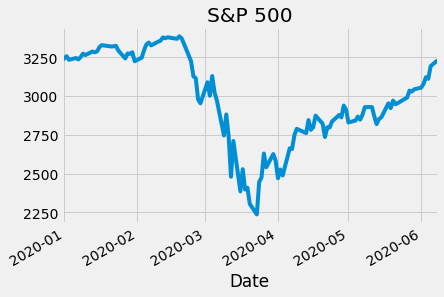

In [50]:
# Plot close
df['Close'].plot(title="S&P 500")

# Show the plot
plt.show()

### Adding stocks data from Google Finance

In [14]:
stocks_df["Price_1_1"] = stocks_df["Symbol"].apply(lambda x: '=IFNA(INDEX(GOOGLEFINANCE("' + x + '","price", "1/1/2020"),2,2), 0)')
stocks_df["Price_3_23"] = stocks_df["Symbol"].apply(lambda x: '=IFNA(INDEX(GOOGLEFINANCE("' + x + '","price", "3/23/2020"),2,2), 0)')
stocks_df["Price_6_8"] = stocks_df["Symbol"].apply(lambda x: '=IFNA(INDEX(GOOGLEFINANCE("' + x + '","price", "6/8/2020"),2,2), 0)')

### Calculation of market cap of companies

In [15]:
stocks_df["Shares"] = stocks_df["Symbol"].apply(lambda x: '=GOOGLEFINANCE("' + x + '","shares")')

### Storing the DataFrame to Google Sheet

In [16]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = Credentials.from_service_account_file('Covid_Analysis.json', scopes=scope)

In [17]:
client = Client(scope=scope, creds=credentials)
spread = Spread("stocks-data", client=client)

In [18]:
cols_to_keep = ["Symbol", "Security", "GICS Sector", "GICS Sub Industry", 
                "Price_1_1", "Price_3_23", "Price_6_8", "Shares"]

In [19]:
spread.df_to_sheet(stocks_df[cols_to_keep])

### Analyzing the Data

In [20]:
stocks_df = spread.sheet_to_df()

In [21]:
stocks_df.head()

,Symbol,Security,GICS Sector,GICS Sub Industry,Price_1_1,Price_3_23,Price_6_8,Shares
index,,,,,,,,
0,MMM,3M Company,Industrials,Industrial Conglomerates,180,117.87,166.87,576019000
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,86.95,62.82,92.56,1770530000
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,89.55,64.5,94.59,1764833000
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,168.81,132.34,253.3,45044000
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,210.15,143.69,211.28,636197000


In [22]:
stocks_df[["Price_1_1", "Price_3_23", "Price_6_8", "Shares"]] = \
stocks_df[["Price_1_1", "Price_3_23", "Price_6_8", "Shares"]].apply(pd.to_numeric)

#### Adding Market Cap Data

In [23]:
stocks_df["Marketcap_1_1"] = stocks_df["Price_1_1"] * stocks_df["Shares"]
stocks_df["Marketcap_3_23"] = stocks_df["Price_3_23"] * stocks_df["Shares"]
stocks_df["Marketcap_6_8"] = stocks_df["Price_6_8"] * stocks_df["Shares"]

#### Adding percentage change of stock prices

In [24]:
# Percentage Change from January 1st to March 23rd 
stocks_df["PercentageChange_3_23_1_1"] = (stocks_df["Price_3_23"] - stocks_df["Price_1_1"]) / stocks_df["Price_1_1"]*100

# Percentage Change from March 23rd to June 8th
stocks_df["PercentageChange_6_8_3_23"] = (stocks_df["Price_6_8"] - stocks_df["Price_3_23"]) / stocks_df["Price_3_23"]*100

# # Percentage Change from January 1st to June 8th
stocks_df["PercentageChange_6_8_1_1"] = (stocks_df["Price_6_8"] - stocks_df["Price_1_1"]) / stocks_df["Price_1_1"]*100

#### Change in the total market cap of the S&P 500

In [25]:
sum(stocks_df["Marketcap_3_23"] - stocks_df["Marketcap_1_1"]) / 10**9

-8616.68022405208

In [26]:
sum(stocks_df["Marketcap_6_8"] - stocks_df["Marketcap_3_23"]) / 10**9

8555.32438289944

In [27]:
sum(stocks_df["Marketcap_6_8"] - stocks_df["Marketcap_1_1"]) / 10**9

-61.35584115264003

#### Change in the total market cap by sector

In [28]:
(stocks_df.groupby("GICS Sector").sum()["Marketcap_3_23"] - stocks_df.groupby("GICS Sector").sum()["Marketcap_1_1"]).sort_values() / 10**9

GICS Sector
Information Technology   -1576.902177
Financials               -1516.153071
Health Care              -1036.222168
Industrials              -1020.591726
Consumer Discretionary    -780.816114
Communication Services    -731.715886
Energy                    -709.292104
Consumer Staples          -450.850054
Real Estate               -266.784534
Utilities                 -263.939546
Materials                 -263.412844
dtype: float64

During the stock market crash in March, the **Information Technology and Financials sectors** were most affected and had the largest drops in **total market cap of 1.574 trillion and 1.516 trillion** respectively.

In [29]:
(stocks_df.groupby("GICS Sector").sum()["Marketcap_6_8"] - stocks_df.groupby("GICS Sector").sum()["Marketcap_1_1"]).sort_values() / 10**9

GICS Sector
Financials               -491.029708
Energy                   -275.964548
Industrials              -172.655255
Consumer Staples          -54.072013
Utilities                 -18.352425
Materials                 -10.744825
Real Estate                -7.803912
Communication Services     78.118768
Health Care                88.993378
Consumer Discretionary    219.473392
Information Technology    582.681307
dtype: float64

As of June 8th, the **Financials and Energy** sectors had the largest drop in total market cap as compared to January 1st.

### Ranking of companies by percentage change of stock prices

In [30]:
stocks_df.sort_values(by=["PercentageChange_3_23_1_1"])[["Security", "PercentageChange_3_23_1_1"]].head(5)

,Security,PercentageChange_3_23_1_1
index,,
348,Norwegian Cruise Line Holdings,-83.562808
44,Apache Corporation,-83.004732
343,Noble Energy Inc,-81.475342
406,Royal Caribbean Group,-79.064241
221,Halliburton Co.,-78.768233


During the 2020 stock market crash in March, the companies that took the hardest hit were **Norwegian Cruise Line Holdings, Apache Corporation, Noble Energy Inc, Royal Caribbean Cruises Ltd, Halliburton Co.** These companies saw drops in their stock prices of over 70%.


In [31]:
print(sum(stocks_df["PercentageChange_3_23_1_1"] < 0))
print(sum(stocks_df["PercentageChange_3_23_1_1"] > 0))

495
10


Out of the 505 companies, only 10 companies saw positive growth from January 1st to March 23rd.

In [32]:
stocks_df[stocks_df["PercentageChange_3_23_1_1"] > 0][['Security', 'GICS Sector', 'GICS Sub Industry', 'Price_1_1','Price_3_23', 'PercentageChange_3_23_1_1']].sort_values(by=['PercentageChange_3_23_1_1'], ascending=False)

,Security,GICS Sector,GICS Sub Industry,Price_1_1,Price_3_23,PercentageChange_3_23_1_1
index,,,,,,
88,Carrier Global,Industrials,Building Products,0.00,11.54,inf
359,Otis Worldwide,Industrials,Industrial Machinery,0.00,40.00,inf
397,Regeneron Pharmaceuticals,Health Care,Biotechnology,373.35,455.63,22.038302
112,The Clorox Company,Consumer Staples,Household Products,152.61,170.14,11.486796
215,Gilead Sciences,Health Care,Biotechnology,65.23,72.61,11.313813
153,Domino's Pizza,Consumer Discretionary,Restaurants,293.40,323.87,10.385140
334,Netflix Inc.,Communication Services,Movies & Entertainment,329.81,360.27,9.235621
111,Citrix Systems,Information Technology,Application Software,111.67,121.60,8.892272
280,Kroger Co.,Consumer Staples,Food Retail,28.66,31.08,8.443824


Among the 10 companies that saw positive growth during the stock market crash in March, Carrier Global and Otis Worldwide were newly listed and were not listed on 1 January 2020. Additionally, Regeneron Pharmaceuticals saw the greatest growth.

In [33]:
print(sum(stocks_df["PercentageChange_6_8_1_1"] < 0))
print(sum(stocks_df["PercentageChange_6_8_1_1"] > 0))

318
187


Since the market stock crash in March, the number of companies which seen positive growth increase from 10 to 184 companies.

In [34]:
stocks_df.groupby("GICS Sector").mean()['PercentageChange_6_8_1_1'].sort_values()

GICS Sector
Energy                   -26.464473
Financials               -11.803682
Consumer Discretionary   -10.293422
Real Estate               -7.020378
Materials                 -5.033668
Utilities                 -4.514530
Communication Services    -2.515204
Consumer Staples          -1.942664
Information Technology     2.969977
Health Care                6.230993
Industrials                     inf
Name: PercentageChange_6_8_1_1, dtype: float64

During the Covid period, the energy sector took the hardest hit with an average of 26.5% drop in stock prices.

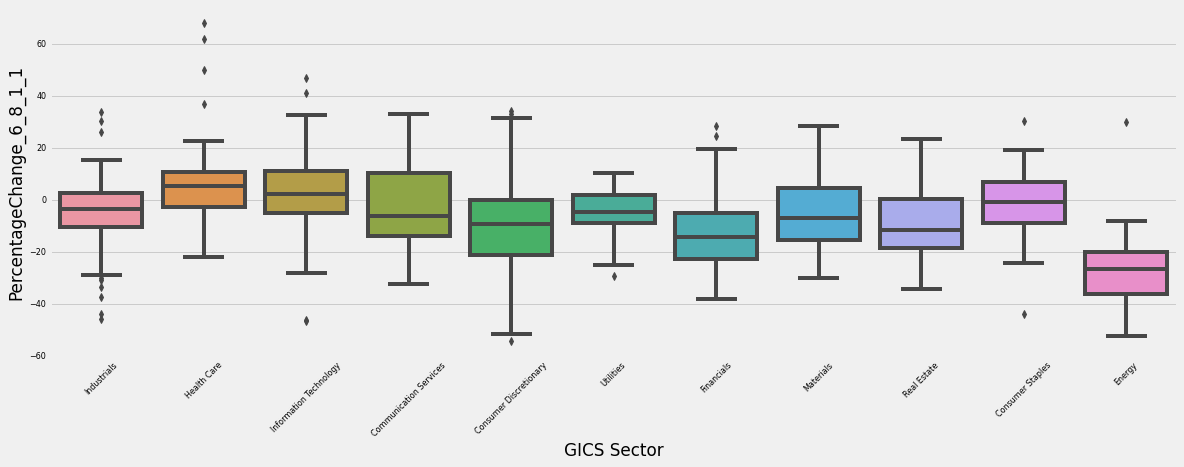

In [35]:
plt.figure(figsize=(18, 6))
plt.tick_params('both', labelsize='8')
plt.xticks(rotation=45)
sns.boxplot(x="GICS Sector", y="PercentageChange_6_8_1_1", data=stocks_df)

The boxplot above represents the 11 sectors' percentage change in stock prices from Janauary 1st to June 8th.

In [36]:
stocks_df.groupby("GICS Sub Industry").mean()['PercentageChange_6_8_1_1'].sort_values()

GICS Sub Industry
Hotels, Resorts & Cruise Lines        -38.967316
Oil & Gas Equipment & Services        -37.481169
Airlines                              -33.118693
Diversified Banks                     -27.241486
Oil & Gas Exploration & Production    -26.587641
                                         ...    
Systems Software                       25.133627
Gold                                   28.505322
Wireless Telecommunication Services    32.917674
Industrial Machinery                         inf
Building Products                            inf
Name: PercentageChange_6_8_1_1, Length: 125, dtype: float64

In [37]:
print(sum(stocks_df.groupby("GICS Sub Industry").mean()['PercentageChange_6_8_1_1'] < 0))
print(sum(stocks_df.groupby("GICS Sub Industry").mean()['PercentageChange_6_8_1_1'] > 0))

77
48


**Department Stores, Hotels, Resorts & Cruise Lines and Oil & Gas Equipment & Services** took the hardest hit due to Covid. 79 of the 138 Sub Industries had their average stock price declined from January 1st to June 8th. 

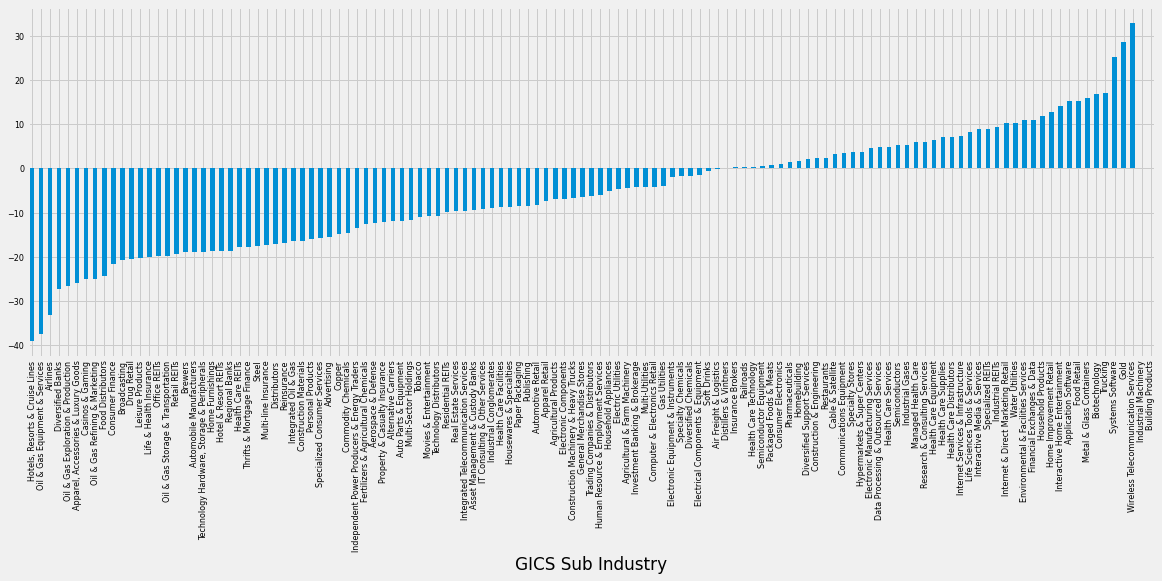

In [38]:
plt.figure(figsize=(18, 6))
plt.tick_params('both', labelsize='8')
stocks_df.groupby("GICS Sub Industry").mean()['PercentageChange_6_8_1_1'].sort_values().plot.bar()

### Percentage Change of stock priced by sector (From March 23rd to June 8th)

In [39]:
stocks_df.groupby("GICS Sector").mean()['PercentageChange_6_8_3_23'].sort_values(ascending=False)

GICS Sector
Energy                    122.141057
Consumer Discretionary     75.060605
Financials                 62.754480
Industrials                61.398792
Materials                  59.758980
Real Estate                51.339221
Health Care                47.900074
Information Technology     47.707214
Communication Services     47.130686
Utilities                  39.141060
Consumer Staples           30.458490
Name: PercentageChange_6_8_3_23, dtype: float64

### Percentage Change of stock priced by Sub Industry (From March 23rd to June 8th)

In [40]:
stocks_df.groupby("GICS Sub Industry").mean()['PercentageChange_6_8_3_23'].sort_values(ascending=False)

GICS Sub Industry
Oil & Gas Exploration & Production       142.865610
Oil & Gas Refining & Marketing           124.744529
Trading Companies & Distributors         123.275497
Household Appliances                     119.386484
Distributors                             113.309353
                                            ...    
Household Products                        21.212216
Integrated Telecommunication Services     19.797806
Drug Retail                                7.819307
Hypermarkets & Super Centers               6.838099
Food Retail                                6.209781
Name: PercentageChange_6_8_3_23, Length: 125, dtype: float64

## How Covid-19 affected other markets?

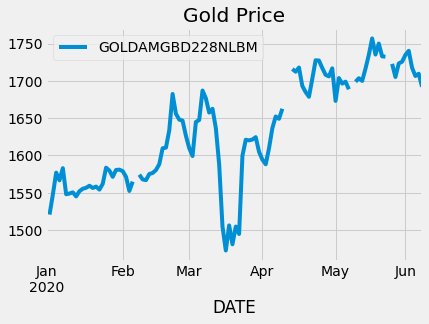

In [59]:
# Set start date
# start = date(1968, 1, 1)
start = date(2020, 1, 1)
end = date(2020, 6, 8)
# Set series code
series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = web.DataReader(series, 'fred', start=start, end= end)

# Inspect the price of gold
# gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price')

# Show the plot
plt.show()

With S&P 500 falling approximately 30% in March 2020, Gold dropped 10% as well. This is an unusual sight as gold has always been seen as a safe haven asset and a useful way to protect your portfolio at times of market decline. However, this signifies that investors rush to hoard cash on coronavirus fear.

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matpl

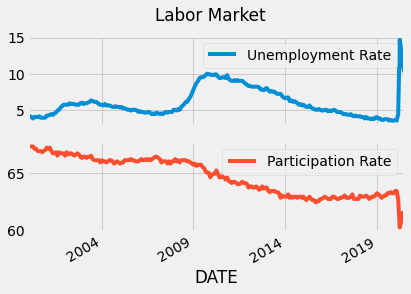

In [60]:
# Set the start date
start = date(2000, 1, 1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = web.DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(title='Labor Market', subplots=True)

# Show the plot
plt.show()

U.S. unemployment rate soars to 14.7 percent, the worst since the Depression era.

### Compare Stock and Bond Performance

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matpl

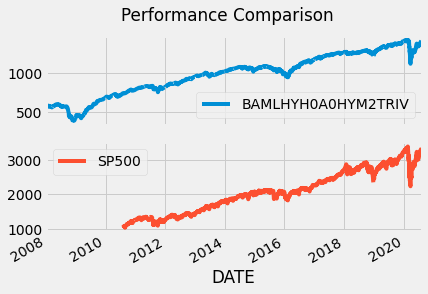

In [46]:
#For bonds, the Bank of America Merrill Lynch US High Yield Total Return Index Value ('BAMLHYH0A0HYM2TRIV') is used. For stocks, the S&P 500 Index ('SP500').

# Set the start date
start = date(2008, 1, 1)

# Set the series codes
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = web.DataReader(series, 'fred', start)

# Plot the results
data.plot(title='Performance Comparison', subplots = True)

# Show the plot
plt.show()

In [55]:
series_code = 'DGS10' # 10-year Treasury Rate
data_source = 'fred' # FED Economic Data Service
start = date(2008, 1, 1)
data = web.DataReader(series_code, data_source, start)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3288 entries, 2008-01-01 to 2020-08-06
Data columns (total 1 columns):
DGS10    3153 non-null float64
dtypes: float64(1)
memory usage: 51.4 KB


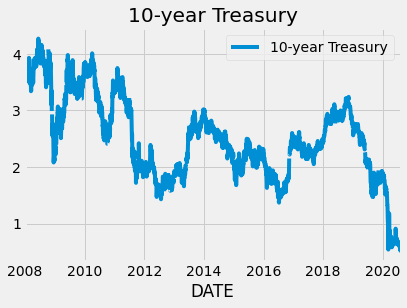

In [56]:
series_name = '10-year Treasury'
data = data.rename(columns={series_code: series_name})
data.plot(title=series_name) 
plt.show()

As the coronavirus outbreak intensified, the yield on the benchmark 10-year U.S. Treasury note dips below 1% for the first time, driving investors to shift away from stocks to safe-haven investments like Treasury.